In [1]:
import numpy as np
import pandas as pd
import pyodbc
import sqlalchemy
import sqlite3
from subprocess import check_output
import os
from IPython.core.display import Image, display

from sqlalchemy import create_engine
engine = create_engine('sqlite:////...', echo=False)

# PRACTICEs

## 1. OLTP and OLAP
#### Motivating question: How should we organize and manage data?
> **`Schemas`**: How should my data logically organized ?
>
> **`Normalization`**: Should my data have minimal dependency and redundancy?
>
> **`View`**: What join will be done most often?
>
> **`Access control`**: Should all users of data have the same level of access??
>
> **`DBMS`**: How do I pick all the `SQL` and `None_SQL` options?
>
> etc.

And it depends on the intended use of the data.

#### Approach to processing data!

| Tasks / examples:  | OL.T.P (Online Transaction Processing) | OL.A.P (Online Analytical Processing)  |
|---------|----------------------------------------|----------------------------------------|
|  | Find the price of book                 |  Calculate book with the best margin
|  | Update the lastest customer transaction|  Find the most loyal customers
| | Keep tracks of employee hours          |  Decide employee of the month

#### General comparision `OLTP` vs `OLAP`!

|         | OLTP     | OLAP    |
|---------|----------|---------|
| Purpose | support daily transaction| report and analyze data |
| Design  | application oriented | subject-oriented  |
| Data   | up-to-date, operational | consolidated, historical |
| Size  | Snapshot, Gigabytes  |  Archive; Terabytes |
| Queries | Simple transaction & frequent updates | Complex, aggregate queries & limited updates |
| Users  |  thousands (customers, employees & data scientist)  |   hundreds (only for the data scientist) |

#### OLAP & PLTP are working together

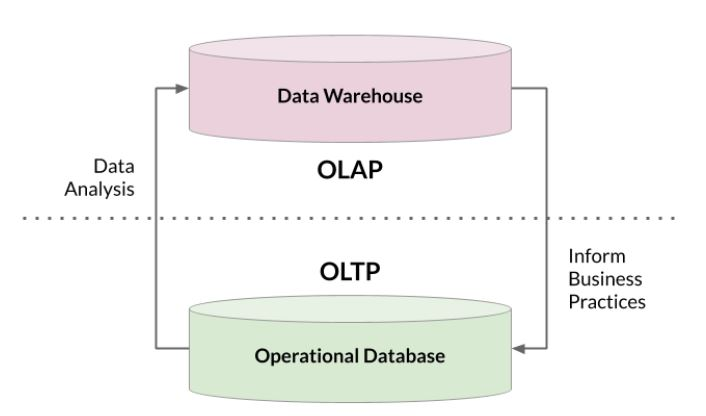

In [2]:
## hidden file

Understanding the differencing between `OLAP` and `OLTP` make you figure out the business requirements!!

### EXERCISEs

#### Exercise 1.1. OLAP vs. OLTP
You should now be familiar with the differences between OLTP and OLAP. In this exercise, you are given a list of cards describing a specific approach which you will categorize between `OLAP` and `OLTP`.

Your lists:

            1) Typically uses a data warehouse.
            2) Data is inserted and updated more often
            3) Queries a larger amount of data
            4) Typically uses an operational database
            5) Most likely to have from the past hour
            6) Help business with the best decision making and problem solving
**SOLUTION.**

|  OLAP         |     OLTP       |
|---------------|----------------|
|(1) Typically uses a data warehouse | (4) Typically uses an operational database |
| (3) Queries a larger amount of data  | (2) Data is inserted and updated more often |
| (6) Help business with the best decision making and problem solving | (5) Most likely to have from the past hour |

In the rest of the course, we'll be referring to these two terms while delving deeper into their technical differences - so don't forget them!

#### Exercise 1.2. Which is better?
The city of Chicago receives many 311 service requests throughout the day. 311 service requests are non-urgent community requests, ranging from graffiti removal to street light outages. Chicago maintains a data repository of all these services organized by type of requests. In this exercise, 

`Potholes` has been loaded as an example of a table in this repository. It contains pothole reports made by Chicago residents from the past week. Explore the first 10 rows in the dataset

creation_date|current_status|completion_date|service_request_id|type_of_service|most_recent_action|street_address|zip
-------------|--------------|---------------|------------------|---------------|------------------|--------------|---
2018-12-17T00:00:00.000|Open|null|18-03380123|Pothole in Street|null|10300 S WALLACE ST|60628.0
2018-12-18T00:00:00.000|Open|null|18-03388180|Pothole in Street|null|4100 S WESTERN BLVD|60609.0
2018-12-18T00:00:00.000|Open|null|18-03388493|Pothole in Street|null|5230 S NEW ENGLAND AVE|60638.0
2018-12-17T00:00:00.000|Open|null|18-03386050|Pothole in Street|null|1053 E 92ND ST|60619.0
2018-12-17T00:00:00.000|Open|null|18-03382135|Pothole in Street|null|4756 W 85TH ST|60652.0
2018-12-17T00:00:00.000|Open|null|18-03382643|Pothole in Street|null|3623 N NORA AVE|60634.0
2018-12-17T00:00:00.000|Completed|2018-12-18T00:00:00.000|18-03378491|Pothole in Street|Completed Upon Arrival|719 N DRAKE AVE|60624.0
2018-12-17T00:00:00.000|Open|null|18-03380795|Pothole in Street|null|1900 S HAMLIN AVE|60623.0
2018-12-18T00:00:00.000|Open|null|18-03388657|Pothole in Street|null|1899 S KOMENSKY AVE|60623.0
2018-12-17T00:00:00.000|Open|null|18-03383604|Pothole in Street|null|1646 N NATOMA AVE|60707.0

**What data processing approach is this larger repository most likely using**?

A. **`OLTP`** because this table could not be used for any analysis.

B. **`OLAP`** because each record has a unique service `request` number.

C. **`OLTP`** because this table's structure appears to require frequent updates.

D. **`OLAP`** because this table focuses on pothole `requests` only.

                        =================================================
                                        ANSWERS & COMMENTs
                        =================================================
*A. Wrong submission!* This data could be used for analysis, it **just wouldn't be as efficient as using an `OLAP`** approach.

*B. Wrong submission!* Look at the following code and query results

            SELECT COUNT(DISTINCT service_request_id) AS count_id, 
                   COUNT(*) as count_all
            FROM potholes
**query result.**

count_id |	count_all
---------|-----------
71 | 71


So this database have a **`unique ID` is normal** for both **`OLAP`** and **`OLTP`** approaches.

**C. Correct!!!**  This table probably uses an **`OLTP`** approach because it is updated and holds data **from the past week**.

*D. Incorrect submission!* This could be an **`OLTP`** table **focused on tracking pothole `requests`**

## 2. Sorting data

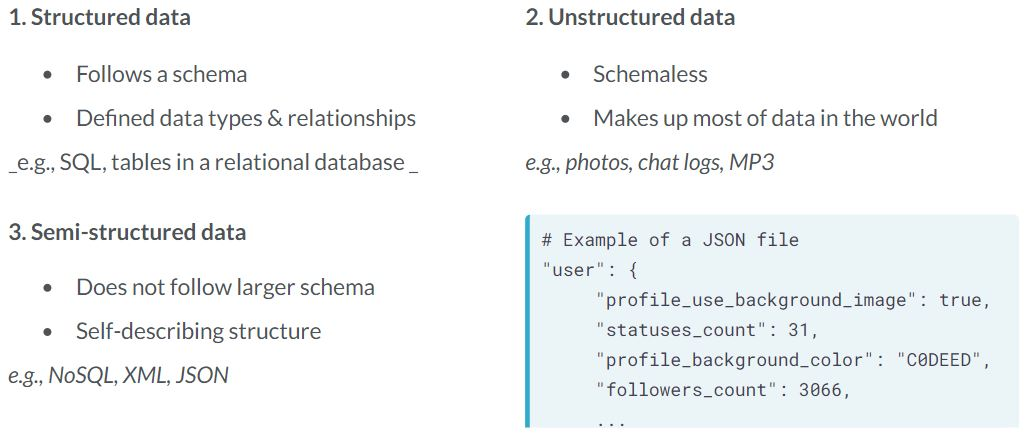

In [3]:
## Structuring data

#### Storing data beyond traditional database

> **Traditional database.** Using for real-time relational structured data? **`OLTP`**
>
> **Data warehouse.**. Use for analyzing archived structured data? **`OLAP`**
>
> **Data Lakes.**
>
>> Use for storing data of all structure = flexibility & scalability
>
>> Use for analyzing big-data!

### DATA WAREHOUSE.

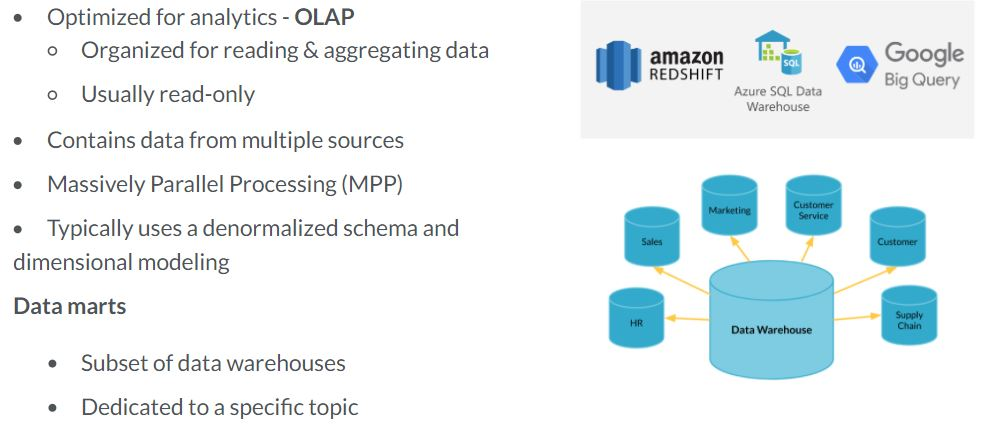

In [4]:
## hidden file

### DATA LAKES

> Store all type of data at a ***lower cost***: `e.g. row, operational database, IoT devices logs, real-time, relational & non-relational`.
>
> Retain all data and can take up petabytes.
>
> `Schema-on-read` as opposed `schema-on-write`
>
> Need to catalog data otherwise become a **data swamp**.
>
> Run **big data analytic** using services such as **Apache Spark** and **Hadoop**. This is useful for `DL (deep learning)` and `data discovery` because activities require so much data.

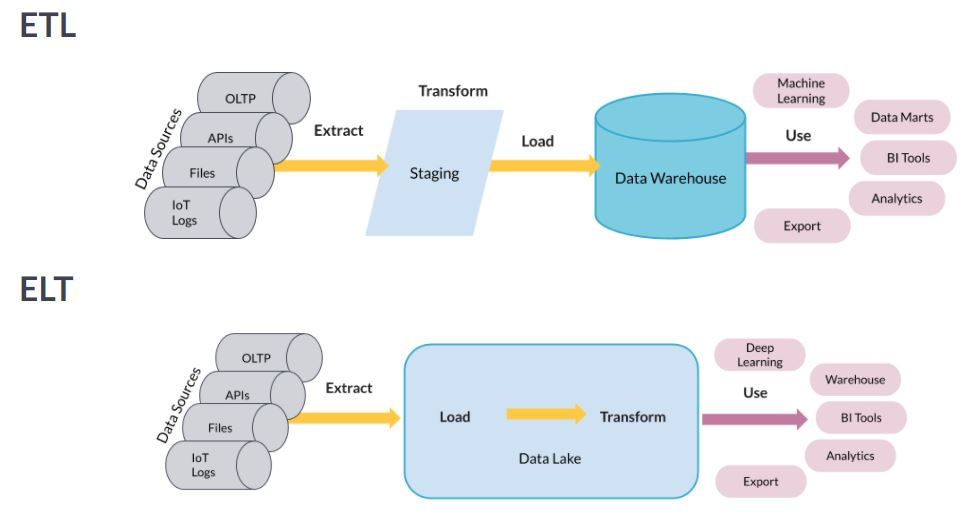

In [5]:
## hidden file

### EXERCISEs (chap2)

#### Exercise 2.1. Name that data type!
In this section, you learned about `structured`, `semi-structured`, and `unstructured` data. 

- Structured data is the easiest to analyze because it is organized and cleaned. 

- On the other hand, unstructured data is schemaless, but scales well. 

- In the middle we have semi-structured data for everything in between.

#### Question
Each of these cards hold a type of data. Place them in the correct category.

**SOLUTION.**

     |===================================|========================================|=====================================|
     |            Unstructured           |             Semi-Structured            |            Structured               |
     *===================================*========================================*=====================================*
     |   Image in your photo library     |  <note><to>Ruanne</to><from>Lis</from> |   A relational database with lastest|
     |                                   | <heading>Thanks!</heading><body>You    | withdrawals and deposits made by    |
     |                                   | rock</body></note>                     | clients                             |
     *-----------------------------------*----------------------------------------*-------------------------------------*
     |   To do notes in the text editor  |  CSVs of open data downloaded from your|                                     |
     |                                   | local government websites              |                                     |
     *-----------------------------------*----------------------------------------*-------------------------------------*
     |   Zip file of all text messages   |  JSON objects of tweets outputed in    |                                     |
     | ever received                     | real-time by the Twitter API           |                                     |
     |===================================|========================================|=====================================|

From these real-life examples, can you see why `unstructured` data is easier to scale than `structured` data?

#### Exercise 2.2. Ordering ETL Tasks
You have been hired to manage data at a small online clothing store. Their system is quite outdated because their only data repository is a traditional database to record transactions.

You decide to upgrade their system to a data warehouse after hearing that different departments would like to run their own business analytics. You reason that an `ELT` approach is unnecessary because there is relatively little data (< 50 GB).

#### Instructions
In the `ETL` flow you design, different steps will take place. Place the steps in the most appropriate order.

**SOLUTION.**

1) `eCommerce API` output real-time data of transaction.

2) `Python script` drop null row and clean data into pre-determinited column.

3) Resulting dataframe is written into an AWS Redshift warehouse.

#### Exercise 2.3. Recommend a storage solution
When should you choose a data warehouse over a data lake?

A. To train a machine learning model with a 150 GB of raw image data.

B. To store real-time social media posts that may be used for future analysis

C. To store customer data that needs to be updated regularly

D. To create accessible and isolated data repositories for other analysts

                    ==========================
                        Answers & comments
                    ==========================
*A. Wrong!!* This task would be run more efficiently in a data lake because the data is large and `unstructured`.

*B. Wrong!!* `Data warehouses` store data that we know will be used for analysis.

*C. Wrong!!* `Data warehouses` are usually `read-only`.

**D. Correct!!!**  `Analysts` will appreciate working in a `data warehouse` more because of its organization of `structured data` that make analysis easier.

## 3. Database design
**What is database design!**

> Determine "how data is logically stored" and "how is data is going to read and updated",
>
> Uses **`database models`** : high-level-specifications for database structure:
>
>> Most popular: `Relational model`
>
>> Some other options: `NoSQL models`, `object-oriented model` and `network model`.
>
> Uses **`schemas`**: blueprint of the database.
>
>> Defined the tables, fields, relationships, indexes and views.
>
>> When inserting data in `relational database`, the `schemas` must be respected!

#### DATA MODELING
Process of creating a data model for the data to be stored.

**1. CONCEPTUAL DATA MODEL.** describes `entities, relationships` and `attributes`

> **Tools:** Data structure diagrams; e.g. `entity-relational diagrams` and `UML diagrams`.

**2. Logical data model.** describes `tables, columns` and `relationships`

> **Tools:** Database model and schemas; e.g. `relational model` and `star schema`.

**3. Physical data model** describe the physical storage.

> **Tools:** `partitions, CPUs, indexes, back-up systems` and `table spaces`  

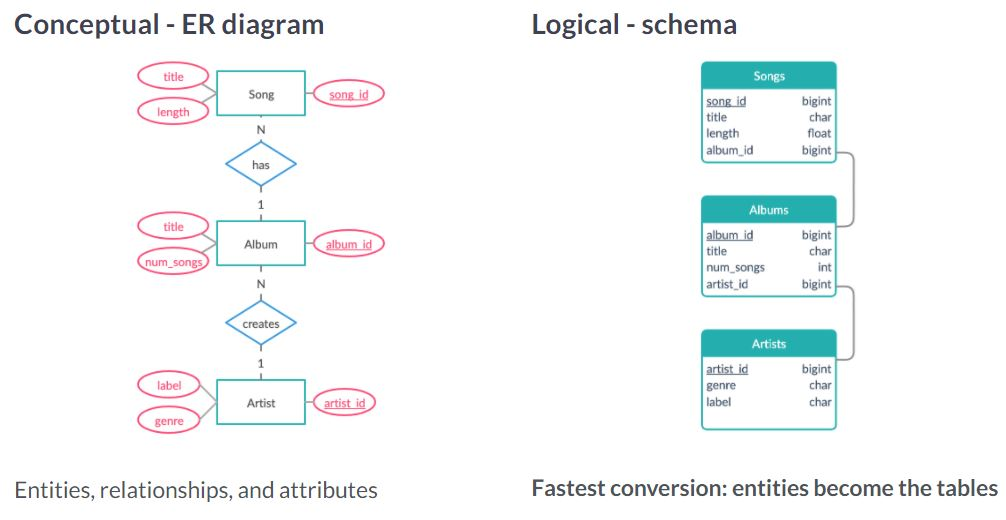

In [6]:
## hidden file

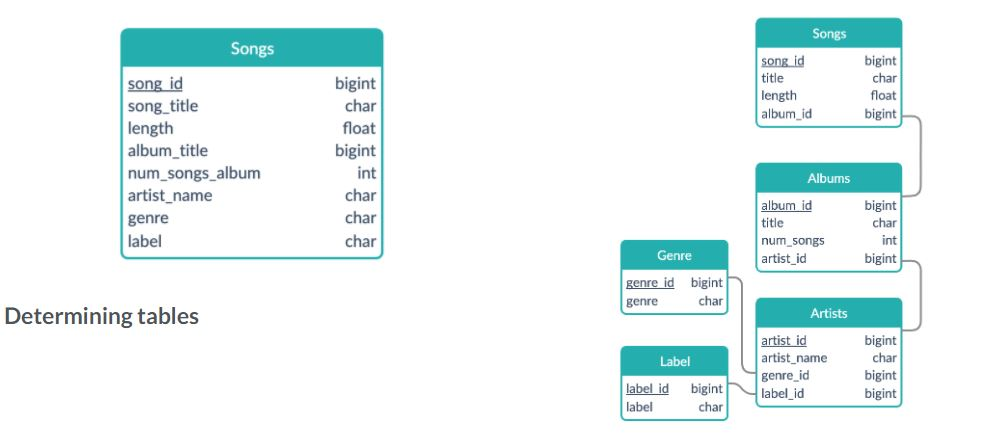

In [7]:
## hidden file

### BEYOND THE RELATIONAL MODEL
#### DIMENSIONAL MODELING
Adaptation relational model for data warehouse design.

- Optimized for OLAP queries, aggregate data, not updating OLTP.
- Built using the star-schema.
- Easy to intepret and extend schema.

#### ELEMENTS OF DIMENSIONAL MODELING,

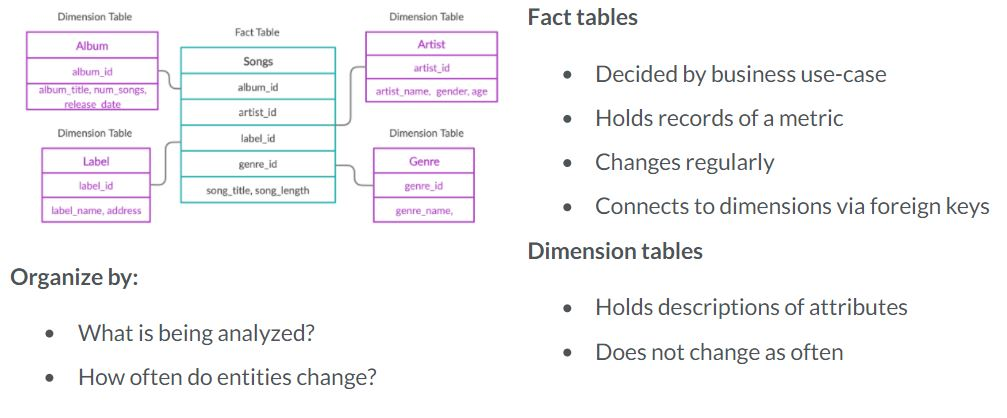

In [8]:
## hidden file

### EXERCISEs

#### Exercise 3.1. Classifying data models
In this section, we learned about three different levels of data models: `conceptual`, `logical`, and `physical`.

#### Instructions
Each of these cards hold a tool or concept that fits into a certain type of data model. Place the cards in the correct `category`.

**SOLUTION.**

         |=================================|=================================|===================================|
         |        Conceptual data model    |         Logical Data-model      |         Physical Data-model       |
         *=================================*=================================*===================================*
         |     Entities, attributes &      |     Relational model            |    File structure of data storage | 
         | relationships                   |                                 |                                   |
         *---------------------------------*---------------------------------*-----------------------------------*
         |    Gathers business requirements|     Determing tables & columns  |                                   |
         |=================================|=================================|===================================|

#### Exercise 3.2. Deciding fact and dimension tables
Imagine that you love running and data. It's only natural that you begin collecting data on your weekly running routine. You're most concerned with tracking how long you are running each week. You also record the route and the distances of your runs. You gather this data and put it into one table called `Runs` with the following schema:

| **runs**   |
|------------|
| duration_mins - float|
| week - int |
| month - varchar(160)
| year - int
| park_name - varchar(160)
| city_name - varchar(160)
| distance_km - float
| route_name - varchar(160)
|                           |

After learning about dimensional modeling, you decide to restructure the schema for the database. Runs has been pre-loaded for you.



database of **Runs**

duration_mins|week|month|year|park_name|city_name|distance_km|route_name
-------------|----|-----|----|---------|---------|-----------|-----------
24.5|3|May|2019|Prospect Park|Brooklyn|5|Simple Loop
61|3|May|2019|Central Park|New York City|8|Resevoir Loop
24.5|3|May|2019|Central Park|New York City|5|Lake Loop
24.5|4|May|2019|Central Park|New York City|5|Lake Loop
48|4|May|2019|Prospect Park|Brooklyn|10|Grove Run
23|4|May|2019|Prospect Park|Brooklyn|5|Simple Loop
24.5|1|June|2019|Central Park|New York City|5|Lake Loop
54.96|1|June|2019|Pennypack Park|Philadelphia|12|Penny Trail Extended
38.4|1|June|2019|Central Park|New York City|8|Resevoir Loop
23.75|1|June|2019|Central Park|New York City|5|Lake Loop
57.6|2|June|2019|Pennypack Park|Philadelphia|12|Penny Trail Extended
31.8|2|June|2019|Pennypack Park|Philadelphia|6|Penny Trail
49|2|June|2019|Liberty State Park|Jersey City|10|Water Front Run
23.35|2|June|2019|Prospect Park|Brooklyn|5|Simple Loop
39.2|3|June|2019|Central Park|New York City|8|Resevoir Loop
27.48|3|June|2019|Pennypack Park|Philadelphia|6|Penny Trail
28.8|3|June|2019|Pennypack Park|Philadelphia|6|Penny Trail
47.5|3|June|2019|Liberty State Park|Jersey City|10|Water Front Run
24|4|June|2019|Central Park|New York City|5|Lake Loop
53|4|June|2019|Prospect Park|Brooklyn|10|Grove Run
24.5|4|June|2019|Prospect Park|Brooklyn|5|Simple Loop
37.36|4|June|2019|Central Park|New York City|8|Resevoir Loop
28.8|1|July|2019|Pennypack Park|Philadelphia|6|Penny Trail
23|1|July|2019|Prospect Park|Brooklyn|5|Simple Loop
49|1|July|2019|Liberty State Park|Jersey City|10|Water Front Run
45.8|1|July|2019|Liberty State Park|Jersey City|10|Water Front Run
24|2|July|2019|Prospect Park|Brooklyn|5|Simple Loop
47.5|2|July|2019|Prospect Park|Brooklyn|10|Grove Run
24|2|July|2019|Central Park|New York City|5|Lake Loop
53|2|July|2019|Liberty State Park|Jersey City|10|Water Front Run
24.5|3|July|2019|Central Park|New York City|5|Lake Loop
37.36|3|July|2019|Central Park|New York City|8|Resevoir Loop
24.5|3|July|2019|Prospect Park|Brooklyn|5|Simple Loop

**Question 1.** Out of these possible answers, what would be the best way to organize the fact table and dimensional tables?

A. A fact table holding `duration_mins` and `foreign keys` to dimension tables holding `route` details and `week` details, respectively.

B. A fact table holding `week,month, year` and `foreign keys` to dimension tables holding `route` details and `duration` details, respectively.

C. A fact table holding `route_name,park_name, distance_km,city_name`, and `foreign keys` to dimension tables holding `week` details and `duration` details, respectively.


                    ========================================
                                Answers & Comments
                    ========================================
**A. Correct!!**

*B. Wrong!* We can create a dimension table with a record for each unique week with `week, month`, and `year`.

*C. Wrong!* The `park_name, distance_km`, and `city_name` would be better in it's own dimension table. We're more interested in the run itself, than where it took place.

#### Question 2. 
Create a dimension table called route that will hold the `route` information.

Create a dimension table called week that will hold the `week` information.

**SOLUTION.**

                -- Create a route dimension table
                CREATE TABLE route(
                    route_id INTEGER PRIMARY KEY,
                    park_name VARCHAR(160) NOT NULL,
                    city_name VARCHAR(160) NOT NULL,
                    distance_km FLOAT NOT NULL,
                    route_name VARCHAR(160) NOT NULL
                );
                -- Create a week dimension table
                CREATE TABLE week(
                    week_id INTEGER PRIMARY KEY,
                    week INTEGER NOT NULL,
                    month VARCHAR(160) NOT NULL,
                    year INTEGER NOT NULL
                );

The `primary keys` `route_id` and `week_id` you created will be `foreign keys` in the fact table.

#### Exercise 3.3. Querying the dimensional model
Here it is! The schema reorganized using the dimensional model: 

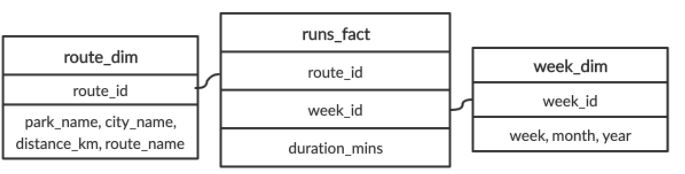

In [9]:
## hidden file

Let's try to run a query based on this schema. How about we try to find the number of minutes we ran in July, 2019? We'll break this up in two steps. First, we'll get the total number of minutes recorded in the database. Second, we'll narrow down that `query` to `week_id's` from July, 2019.

#### Instructions 
**Step 1.** Calculate the sum of the `duration_mins` column.

**SOLUTION.**

                    SELECT SUM(duration_mins)
                    FROM runs_fact;
**query result.**

| sum |
|-----|
|1172.16|

**Step 2.** Join `week_dim` and `runs_fact`. Then get all the `week_id's` from July, 2019.

**SOLUTION.**

                SELECT SUM(duration_mins)
                FROM runs_fact

                -- Get all the week_id's that are from July, 2019
                INNER JOIN week_dim
                    ON week_dim.week_id = runs_fact.week_id
                WHERE week_dim.month = 'July' and week_dim.year = '2019';
**query result.**

|sum
|------
|381.46


Nice! It looks like you've run 3.46 minutes in July. Because of its structure, the dimensional model usually require queries involving more than one table.